# WeatherAPI
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../Output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)


# Print the city count to confirm sufficient count
len(cities)

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [10]:
# Saving base URL and changing units from metric to imperial
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
record_count = 1
set_count = 1

# Lists to pull in data from Weather API
names = []
lat = []
lng = []
current_temp = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Loop through cities and collect weather data json file.  Print out name and record/set number.  Sleep for 60 seconds after each 50 record pull.
for city in cities:
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    response = requests.get(query_url + city).json()
    try:
        names.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        current_temp.append(response['main']['temp'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    except KeyError:
        print(f"{city} not found in weather site.")
    record_count += 1
    if record_count % 50 == 0:
        set_count += 1
        time.sleep(60)

Processing Record 1 of Set 1 | kaman
Processing Record 2 of Set 1 | kuloy
Processing Record 3 of Set 1 | chepo
Processing Record 4 of Set 1 | stanley
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | songea
Processing Record 7 of Set 1 | fiambala
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | ilulissat
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | san antonio de pale
Processing Record 12 of Set 1 | galveston
Processing Record 13 of Set 1 | iqaluit
Processing Record 14 of Set 1 | kone
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | yuzhno-kurilsk
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | jijiang
Processing Record 19 of Set 1 | talnakh
Processing Record 20 of Set 1 | uturoa
Processing Record 21 of Set 1 | invercargill
Processing Record 22 of Set 1 | port-aux-francais
Processing Record 23 of Set 1 | maragogi
Processing Record 24 of Set 1 | fauske


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
lists = {
    "names": names,
    "lat": lat,
    "lng": lng,
    "current_temp": current_temp,
    "max_temp": max_temp,
    "humidity": humidity,
    "cloudiness": cloudiness,
    "wind_speed": wind_speed,
    "country": country,
    "date": date
}
for list in lists:
    print(f"The length of {list} is {len(lists[list])}")



The length of names is 575
The length of lat is 575
The length of lng is 575
The length of current_temp is 575
The length of max_temp is 575
The length of humidity is 575
The length of cloudiness is 575
The length of wind_speed is 575
The length of country is 575
The length of date is 575


In [20]:
weather_dict = {
    "Name": names,
    "Latitude": lat,
    "Longitude": lng,
    "Current Temp": current_temp,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}

weather_data = pd.DataFrame(weather_dict)

weather_data.to_csv(output_data_file)

weather_data.head()

,Name,Latitude,Longitude,Current Temp,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kāman,27.6500,77.2667,68.50,68.50,23,21,7.40,IN,1709995181
1,Kuloy,61.0305,42.4925,18.09,18.09,97,100,0.85,RU,1709995181
2,Chepo,9.1667,-79.1000,85.78,86.97,57,27,9.95,PA,1709995181
3,Stanley,54.8680,-1.6985,40.93,43.72,91,75,13.80,GB,1709995181
4,Adamstown,-25.0660,-130.1015,76.80,76.80,72,6,9.75,PN,1709994969


In [21]:
weather_data.describe()

,Latitude,Longitude,Current Temp,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,5.750000e+02
mean,17.989460,18.781997,57.883600,58.305148,68.420870,59.161739,8.799009,1.709996e+09
std,32.939553,88.333031,28.794616,28.707842,23.851681,39.683898,6.149015,2.613444e+02
min,-54.800000,-176.559700,-26.590000,-26.590000,4.000000,0.000000,0.000000,1.709995e+09
25%,-9.089450,-59.250000,38.010000,39.495000,56.000000,18.000000,4.270000,1.709996e+09
50%,22.616300,23.716200,66.180000,67.930000,74.000000,75.000000,7.780000,1.709996e+09
75%,46.058650,91.110050,80.690000,80.790000,87.000000,99.500000,11.500000,1.709996e+09
max,78.218600,179.383300,109.290000,109.290000,100.000000,100.000000,42.570000,1.709996e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [23]:
weather_data[weather_data['Humidity'] > 100].count()

Name            0
Latitude        0
Longitude       0
Current Temp    0
Max Temp        0
Humidity        0
Cloudiness      0
Wind Speed      0
Country         0
Date            0
dtype: int64

In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

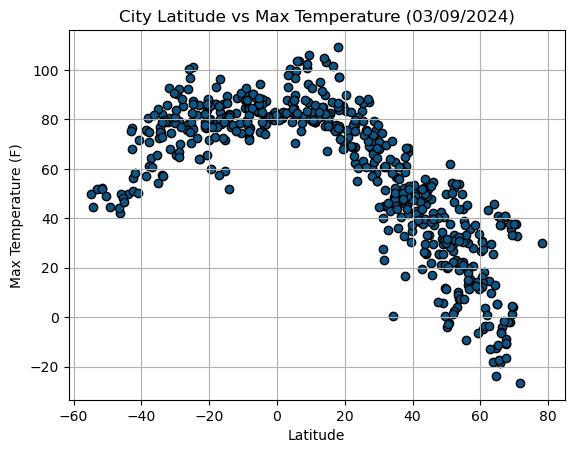

In [68]:
plt.scatter(weather_data['Latitude'],weather_data['Max Temp'], color='#0D5685', edgecolors = 'black')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs Max Temperature (03/09/2024)")
plt.grid(True)
plt.show()

There appears to be a strong correlation between max temperature and latitude.  As latitude increases (we move farther north away from the equator), the max temperature of the cities drops.

## Latitude vs. Humidity Plot

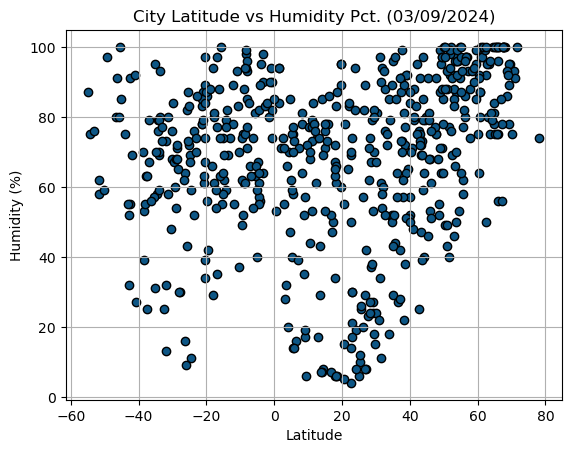

In [72]:
plt.scatter(weather_data['Latitude'],weather_data['Humidity'], color='#0D5685', edgecolors = 'black')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity Pct. (03/09/2024)")
plt.grid(True)
plt.show()

There doesn't appear to be any kind or correlation between Latitude and Humidity percentage based on our city sample.

## Latitude vs. Cloudiness Plot

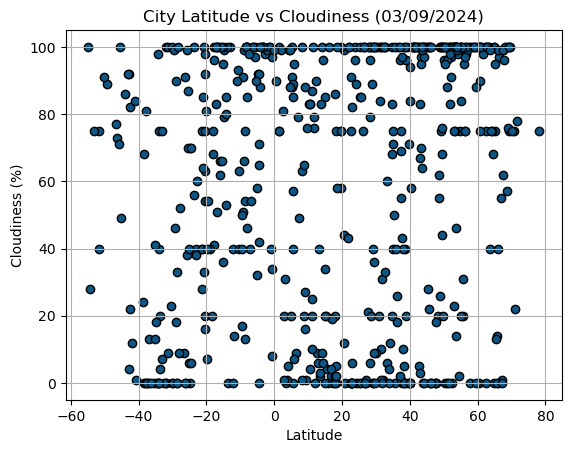

In [70]:
plt.scatter(weather_data['Latitude'],weather_data['Cloudiness'], color='#0D5685', edgecolors = 'black')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (03/09/2024)")
plt.grid(True)
plt.show()

There doesn't appear to be any kind of correlation between latitude and cloudiness percentage based on our city sample.

## Latitude vs. Wind Speed Plot

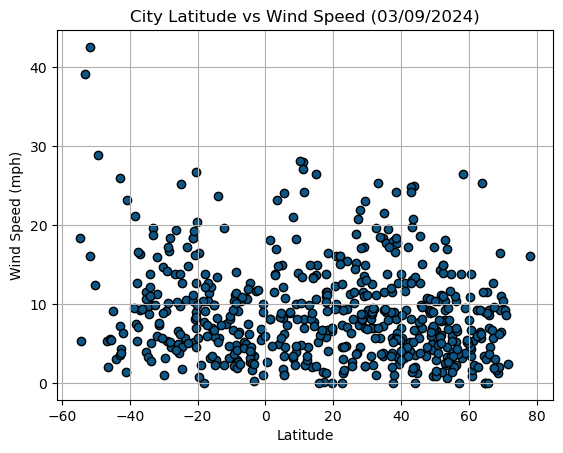

In [71]:
plt.scatter(weather_data['Latitude'],weather_data['Wind Speed'], color='#0D5685', edgecolors = 'black')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed (03/09/2024)")
plt.grid(True)
plt.show()

There doesn't appear to be any kind of correlation between latitude and wind speed based on our city sample.

## Linear Regression

In [24]:
# For each of the above plots calculate and plot a linear regression using the steps below
from sklearn.linear_model import LinearRegression

# Create linear regression function
def linear_regression(df,x,y):
# Set your x and y and reshape to np array
    x = df[x].values.reshape(-1, 1)
    y = df[y].values.reshape(-1, 1)

# Fit your Model
    linear_regressor = LinearRegression().fit(x, y)
# Generate predictions and store in df
# Plot the data for each plot

# Generate predictions and store in df
    df['YPRED'] = linear_regressor.predict(x)

# Plot the data
    ax = df.plot.scatter(x='RM', y='MEDV')
    df.plot(x='RM', y='YPRED', color='red', ax=ax)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


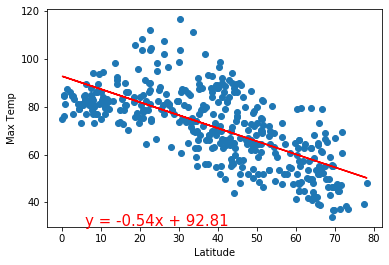

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


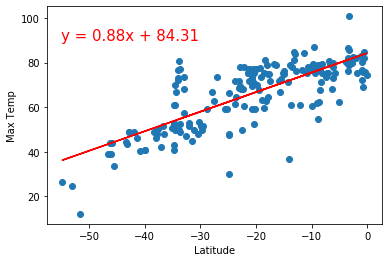

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


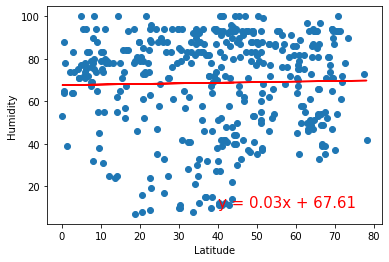

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


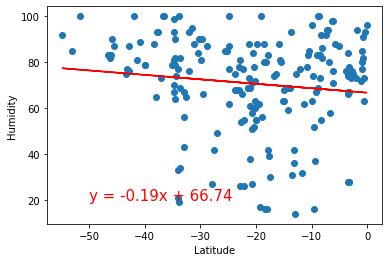

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


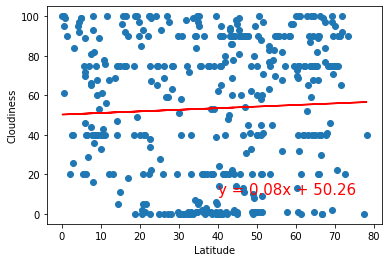

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


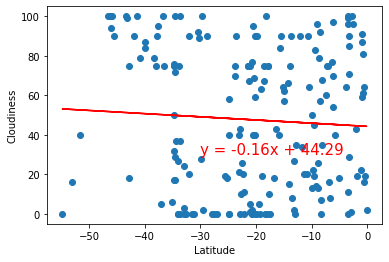

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


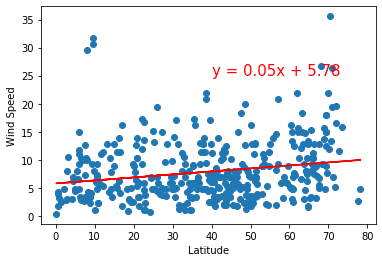

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


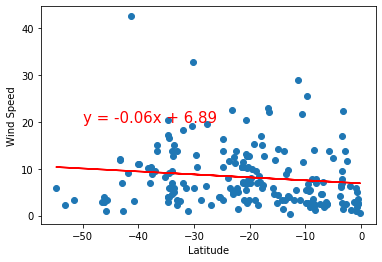